In [213]:
class Para:
    data_in_sample_path = 'data/sk_space_1d_rate_20d_17-21_pre/0.csv'
    data_test_path = 'data/sk_space_1d_rate_20d_22-22_pre/0.csv'

    feature_column_start_name = 'ep_ratio_ttm'
    feature_column_end_name = 'BR'

    percent_cv = 0.1

para = Para()

## 构建训练集与交叉验证集

In [214]:
import pandas as pd
import numpy as np

data_in_sample = pd.read_csv(para.data_in_sample_path)

data_in_sample = data_in_sample.dropna(axis=0)

data_in_sample.insert(loc=0, column='return_bin', value=np.nan)

data_in_sample.loc[data_in_sample['yield_rate'] > 0, 'return_bin'] = 0
data_in_sample.loc[data_in_sample['yield_rate'] <= 0, 'return_bin'] = 1

data_in_sample['return_bin'] = data_in_sample['return_bin'].astype(np.int64)

In [215]:
data_in_sample.dtypes

return_bin         int64
order_book_id     object
board_type        object
sector_code       object
month              int64
date              object
yield_rate       float64
ep_ratio_ttm     float64
pb_ratio_ttm     float64
sp_ratio_ttm     float64
MACD_DIFF        float64
MACD_DEA         float64
MACD_HIST        float64
RSI10            float64
SY               float64
BIAS20           float64
VOL30            float64
VOL60            float64
VOL120           float64
VOLT20           float64
VOLT60           float64
AR               float64
BR               float64
dtype: object

In [216]:
data_in_sample

,return_bin,order_book_id,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,1,600376.XSHG,MainBoard,RealEstate,0,2017-01-03,-0.235758,-1.411342,2.269983,-1.273296,...,-0.176158,1.939393,-0.343228,3.077250,2.097063,2.504830,0.386540,0.343156,-0.477163,-1.110336
1,1,600376.XSHG,MainBoard,RealEstate,1,2017-01-04,-0.212666,-1.419161,2.312394,-1.280733,...,0.563332,1.939393,-0.123865,3.058393,2.052508,2.496684,0.328454,0.339311,-0.623190,-1.059116
2,1,600376.XSHG,MainBoard,RealEstate,2,2017-01-05,-0.012847,-1.415701,2.293545,-1.277441,...,0.205077,1.267610,-0.129406,2.845400,2.009023,2.478314,0.140969,0.342943,-0.661480,-0.998378
3,0,600376.XSHG,MainBoard,RealEstate,3,2017-01-06,0.008439,-1.417434,2.302970,-1.279090,...,0.102341,1.939393,-0.032727,2.658063,1.981885,2.455540,-0.015838,0.342943,-0.541901,-0.971592
4,1,600376.XSHG,MainBoard,RealEstate,4,2017-01-09,-0.054613,-1.420023,2.317107,-1.281552,...,0.818119,1.939393,0.093412,2.005796,1.972691,2.419643,-0.342537,0.340627,-1.345192,-1.570440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0,600376.XSHG,MainBoard,RealEstate,1192,2021-11-29,2.146251,1.209308,-1.466971,3.029146,...,0.019490,-0.747738,0.223932,-0.048353,-0.370257,-0.790084,-1.188693,-0.353637,-0.928837,-1.234122
1190,0,600376.XSHG,MainBoard,RealEstate,1193,2021-11-30,2.398559,1.232542,-1.478548,3.062748,...,-0.058182,-0.747738,0.067898,-0.101384,-0.371908,-0.790859,-1.197434,-0.333250,-0.439751,-0.827627
1191,0,600376.XSHG,MainBoard,RealEstate,1194,2021-12-01,2.238078,1.186366,-1.455393,2.995967,...,0.530404,-0.075955,0.357910,-0.112933,-0.373548,-0.786568,-1.193840,-0.319589,-0.044396,-0.533675
1192,0,600376.XSHG,MainBoard,RealEstate,1195,2021-12-02,2.176447,1.126572,-1.424521,2.909491,...,0.998287,-0.075955,0.710331,-0.095406,-0.369987,-0.776094,-1.137295,-0.315319,0.754954,-0.036107


In [217]:
from sklearn.model_selection import train_test_split

X_in_sample = data_in_sample.loc[:, para.feature_column_start_name: para.feature_column_end_name]
y_in_sample = data_in_sample.loc[:, 'return_bin']

X_train, X_cv, y_train, y_cv = train_test_split(X_in_sample, y_in_sample, test_size=para.percent_cv, shuffle=False)

X_train

,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,MACD_HIST,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,-1.411342,2.269983,-1.273296,-1.025096,-0.866096,-0.652229,-0.176158,1.939393,-0.343228,3.077250,2.097063,2.504830,0.386540,0.343156,-0.477163,-1.110336
1,-1.419161,2.312394,-1.280733,-0.923666,-0.893492,-0.290177,0.563332,1.939393,-0.123865,3.058393,2.052508,2.496684,0.328454,0.339311,-0.623190,-1.059116
2,-1.415701,2.293545,-1.277441,-0.852875,-0.900033,-0.070599,0.205077,1.267610,-0.129406,2.845400,2.009023,2.478314,0.140969,0.342943,-0.661480,-0.998378
3,-1.417434,2.302970,-1.279090,-0.774502,-0.888245,0.122402,0.102341,1.939393,-0.032727,2.658063,1.981885,2.455540,-0.015838,0.342943,-0.541901,-0.971592
4,-1.420023,2.317107,-1.281552,-0.685683,-0.859525,0.300690,0.818119,1.939393,0.093412,2.005796,1.972691,2.419643,-0.342537,0.340627,-1.345192,-1.570440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,0.865492,-1.035077,1.289191,-0.005168,-0.109375,0.271298,1.026958,-0.075955,0.431593,-0.109275,-0.466151,-0.773933,-0.969268,-0.918862,-0.714858,-0.785255
1070,0.848154,-1.023156,1.270623,0.035801,-0.079734,0.310384,1.090179,0.595827,0.504560,-0.328337,-0.474823,-0.773665,-0.990972,-0.924201,-0.401836,-0.627900
1071,0.853913,-1.027130,1.276791,0.064486,-0.049791,0.313559,1.090179,-0.075955,0.411834,-0.432338,-0.500946,-0.774325,-1.052036,-0.927824,-0.324829,-0.482743
1072,0.871313,-1.039051,1.295425,0.072421,-0.024114,0.268650,0.497477,-0.075955,0.240095,-0.522253,-0.522041,-0.776736,-1.180918,-0.933460,-0.261731,-0.653516


## 构建测试集

In [218]:
import pandas as pd
import numpy as np

data_test = pd.read_csv(para.data_test_path)

data_test = data_test.dropna(axis=0)

data_test.insert(loc=0, column='return_bin', value=np.nan)

data_test.loc[data_test['yield_rate'] > 0, 'return_bin'] = 0
data_test.loc[data_test['yield_rate'] <= 0, 'return_bin'] = 1

data_test['return_bin'] = data_test['return_bin'].astype(np.int64)

In [219]:
data_test.dtypes

return_bin         int64
order_book_id     object
board_type        object
sector_code       object
month              int64
date              object
yield_rate       float64
ep_ratio_ttm     float64
pb_ratio_ttm     float64
sp_ratio_ttm     float64
MACD_DIFF        float64
MACD_DEA         float64
MACD_HIST        float64
RSI10            float64
SY               float64
BIAS20           float64
VOL30            float64
VOL60            float64
VOL120           float64
VOLT20           float64
VOLT60           float64
AR               float64
BR               float64
dtype: object

In [220]:
data_test

,return_bin,order_book_id,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,0,600376.XSHG,MainBoard,RealEstate,0,2022-01-04,2.150414,0.885993,-0.904836,0.885993,...,0.584014,0.563670,0.736664,0.589693,0.984890,-2.406332,0.333570,-2.223795,0.653695,0.949237
1,0,600376.XSHG,MainBoard,RealEstate,1,2022-01-05,1.379074,0.014344,-0.044409,0.014344,...,0.260424,1.395753,1.165683,0.777085,1.253139,-1.980971,-0.217059,-1.976358,1.509365,1.592895
2,0,600376.XSHG,MainBoard,RealEstate,2,2022-01-06,1.793948,0.127999,-0.159133,0.127999,...,0.603361,1.395753,0.907695,0.847909,1.395975,-1.812021,-0.870438,-1.743586,1.467776,1.639934
3,0,600376.XSHG,MainBoard,RealEstate,3,2022-01-07,1.119903,-0.487725,0.471847,-0.487725,...,1.629346,1.395753,1.258799,0.960404,1.644152,-1.563709,-0.317418,-1.445352,1.725487,1.953677
4,0,600376.XSHG,MainBoard,RealEstate,4,2022-01-10,0.744371,-0.210673,0.185038,-0.210673,...,1.296049,1.395753,0.947061,1.039450,1.498971,-1.378603,-0.103479,-1.236502,0.736792,1.220539
5,1,600376.XSHG,MainBoard,RealEstate,5,2022-01-11,-0.262400,-0.974956,0.988103,-0.974956,...,1.537822,1.395753,1.389042,1.155654,1.594796,-1.084856,0.373692,-0.953711,1.452116,1.654475
6,1,600376.XSHG,MainBoard,RealEstate,6,2022-01-12,-0.676498,-1.344069,1.389636,-1.344069,...,1.544884,1.395753,1.525159,1.316973,1.578428,-0.818150,0.851443,-0.590917,1.362333,1.394781
7,1,600376.XSHG,MainBoard,RealEstate,7,2022-01-13,-0.985707,-1.551249,1.619083,-1.551249,...,1.564968,1.395753,1.534517,1.368277,1.602327,-0.643695,1.282435,-0.223983,1.231482,1.078255
8,1,600376.XSHG,MainBoard,RealEstate,8,2022-01-14,-0.357573,-1.239467,1.274912,-1.239467,...,1.223820,1.395753,1.166906,1.325482,1.625601,-0.468134,1.508347,0.080129,0.842428,0.758957
9,1,600376.XSHG,MainBoard,RealEstate,9,2022-01-17,-0.072861,-1.134181,1.160188,-1.134181,...,1.223820,0.563670,0.951968,1.307809,0.853988,-0.295579,1.498436,0.264770,0.468502,0.108179


In [221]:
X_test = data_test.loc[:, para.feature_column_start_name: para.feature_column_end_name]
y_test = data_test.loc[:, 'return_bin']

X_test

,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,MACD_HIST,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
0,0.885993,-0.904836,0.885993,0.509815,0.371793,0.695278,0.584014,0.563670,0.736664,0.589693,0.984890,-2.406332,0.333570,-2.223795,0.653695,0.949237
1,0.014344,-0.044409,0.014344,0.642553,0.409583,0.997898,0.260424,1.395753,1.165683,0.777085,1.253139,-1.980971,-0.217059,-1.976358,1.509365,1.592895
2,0.127999,-0.159133,0.127999,0.706257,0.457539,1.081687,0.603361,1.395753,0.907695,0.847909,1.395975,-1.812021,-0.870438,-1.743586,1.467776,1.639934
3,-0.487725,0.471847,-0.487725,0.826973,0.529490,1.279456,1.629346,1.395753,1.258799,0.960404,1.644152,-1.563709,-0.317418,-1.445352,1.725487,1.953677
4,-0.210673,0.185038,-0.210673,0.853349,0.594390,1.221338,1.296049,1.395753,0.947061,1.039450,1.498971,-1.378603,-0.103479,-1.236502,0.736792,1.220539
5,-0.974956,0.988103,-0.974956,0.968950,0.678474,1.379447,1.537822,1.395753,1.389042,1.155654,1.594796,-1.084856,0.373692,-0.953711,1.452116,1.654475
6,-1.344069,1.389636,-1.344069,1.092924,0.780233,1.525136,1.544884,1.395753,1.525159,1.316973,1.578428,-0.818150,0.851443,-0.590917,1.362333,1.394781
7,-1.551249,1.619083,-1.551249,1.196240,0.890387,1.594316,1.564968,1.395753,1.534517,1.368277,1.602327,-0.643695,1.282435,-0.223983,1.231482,1.078255
8,-1.239467,1.274912,-1.239467,1.196175,0.978491,1.412590,1.223820,1.395753,1.166906,1.325482,1.625601,-0.468134,1.508347,0.080129,0.842428,0.758957
9,-1.134181,1.160188,-1.134181,1.149521,1.035994,1.160374,1.223820,0.563670,0.951968,1.307809,0.853988,-0.295579,1.498436,0.264770,0.468502,0.108179


In [222]:
y_test

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    0
30    0
Name: return_bin, dtype: int64

## 训练模型

In [223]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pandas as pd

index = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
columns = [2, 3, 4, 5, 6, 7, 8]

train_accuracy_df = pd.DataFrame(index=index, columns=columns, dtype=np.float64)
train_accuracy_df.index.name = 'subsample'
train_accuracy_df.columns.name = 'max_depth'

cv_accuracy_df = pd.DataFrame(index=index, columns=columns, dtype=np.float64)
cv_accuracy_df.index.name = 'subsample'
cv_accuracy_df.columns.name = 'max_depth'

test_accuracy_df = pd.DataFrame(index=index, columns=columns, dtype=np.float64)
test_accuracy_df.index.name = 'subsample'
test_accuracy_df.columns.name = 'max_depth'

for subsample in index:
    for max_depth in columns:

        model = xgb.XGBClassifier(
            subsample=subsample,
            max_depth=max_depth,
            objective="binary:logistic",
            use_label_encoder=False,
            eval_metric="logloss",
        )

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_cv_pred = model.predict(X_cv)
        y_test_pred = model.predict(X_test)

        train_accuracy_df.loc[subsample, max_depth] = accuracy_score(y_train, y_train_pred)
        cv_accuracy_df.loc[subsample, max_depth] = accuracy_score(y_cv, y_cv_pred)
        test_accuracy_df.loc[subsample, max_depth] = accuracy_score(y_test, y_test_pred)

        # print(subsample, max_depth)
        # print(type(train_accuracy_df.loc[subsample, max_depth]))

In [224]:
train_accuracy_df.dtypes

max_depth
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df: pd.DataFrame, df_name):
    sns.heatmap(
        data=df,
        xticklabels=df.columns.values,
        yticklabels=df.index.values,
        annot=True,
        cmap='YlGnBu'
    )

    plt.xlabel(xlabel='max_depth')
    plt.ylabel(ylabel='subsample')
    plt.title(label=df_name)

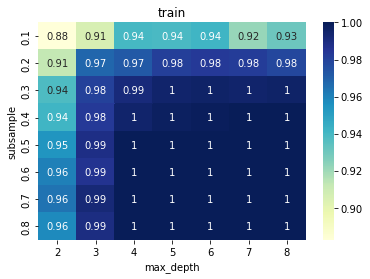

In [226]:
plot_heatmap(train_accuracy_df, 'train')

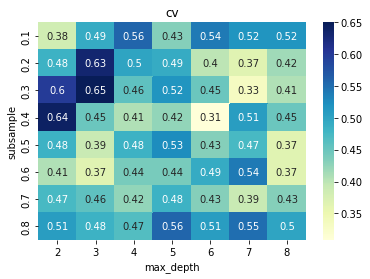

In [227]:
plot_heatmap(cv_accuracy_df, 'cv')

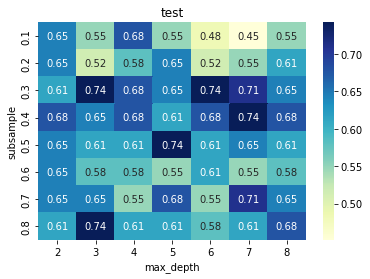

In [228]:
plot_heatmap(test_accuracy_df, 'test')